# Data preprocessing for Fusion and Model

Importing Libraries

In [39]:
# Essentials
import pandas as pd
import numpy as np

# Processing
from sklearn.preprocessing import StandardScaler

# Model

# Visualization

# Warnings
import warnings
warnings.filterwarnings('ignore')

Loading Datasets

In [40]:
# Clinical Datasets
African = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/African_pro.csv")
Bangladesh = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/Bangladesh_pro.csv")
Iraq = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/Iraq_pro.csv")

# Genetic Datasets
inter_genetic = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/genetic/inter_genetic_dataset.csv")
normal_genetic = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/genetic/normal_genetic_dataset.csv")

Checking Target Columns

In [41]:
print(African.columns, "\n")
print(Bangladesh.columns, "\n")
print(Iraq.columns, "\n")
print(inter_genetic.columns, "\n")
print(normal_genetic.columns)

Index(['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio', 'Age', 'Gender',
       'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist',
       'hip', 'Waist/hip ratio', 'Diabetes'],
      dtype='object') 

Index(['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height',
       'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke',
       'gender_Encoded', 'diabetic_Encoded'],
      dtype='object') 

Index(['Age', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI',
       'Gender_Encoded', 'Class_Encoded'],
      dtype='object') 

Index(['STUDY', 'DISEASE_DESCRIPTION', 'REGION', 'CHR_ID', 'CHR_POS',
       'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID',
       'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'SNPS', 'MERGED',
       'GENOMIC_CONTEXT', 'INTERGENIC', 'RISK_ALLELE_FREQUENCY', 'PVALUE',
       'PVALUE_MLOG', 'EFFECT_SIZE', 'CASE_PERCENTAGE', 'CI_LOWER_

Uniting Target Columns' name

Checking Data Types 

In [42]:
print(African.dtypes, '\n')
print(Bangladesh.dtypes, '\n')
print(Iraq.dtypes, '\n')
print(inter_genetic.dtypes, '\n')
print(normal_genetic.dtypes, '\n')

Cholesterol          int64
Glucose              int64
HDL Chol             int64
Chol/HDL ratio     float64
Age                  int64
Gender               int64
Height               int64
Weight               int64
BMI                float64
Systolic BP          int64
Diastolic BP         int64
waist                int64
hip                  int64
Waist/hip ratio    float64
Diabetes             int64
dtype: object 

age                         int64
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
gender_Encoded              int64
diabetic_Encoded            int64
dtype: object 

Age                 int64
Urea              float64
C

Checking number of columns and rows

In [43]:
print(African.shape, '\n')
print(Bangladesh.shape, '\n')
print(Iraq.shape, '\n')
print(inter_genetic.shape, '\n')
print(normal_genetic.shape, '\n')

(390, 15) 

(5437, 15) 

(786, 12) 

(1110, 28) 

(2141, 25) 



In [44]:
African.rename(columns={
    'Diabetes': 'T2D',
}, inplace=True)
 
Bangladesh.rename(columns={
    'diabetic_Encoded': 'T2D',
}, inplace=True)
 
Iraq.rename(columns={
    'Class_Encoded': 'T2D',
}, inplace=True)
 
# Add a new column 'T2D' with all values set to 1
#inter_genetic['T2D'] = 1
 
# Add a new column 'T2D' with all values set to 1
#normal_genetic['T2D'] = 1

#  Imports & Target Renaming


In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score, confusion_matrix
)

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam

# Rename clinical targets to 'T2D'
African.rename(columns={'Diabetes':'T2D'},      inplace=True)
Bangladesh.rename(columns={'diabetic_Encoded':'T2D'}, inplace=True)
Iraq.rename(columns={'Class_Encoded':'T2D'},    inplace=True)

# Ensure genetic sets have a 'T2D' column (all positives)
for df in (inter_genetic, normal_genetic):
    if 'T2D' not in df.columns:
        df['T2D'] = 1


# Clinical Train/Val/Test Split


In [46]:
test_size_clin = 0.20
val_size_clin  = 0.15
rs             = 42

def split_clinical(df):
    X_tr_val, X_test, y_tr_val, y_test = train_test_split(
        df.drop(columns='T2D'), df['T2D'],
        test_size=test_size_clin, stratify=df['T2D'], random_state=rs
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_tr_val, y_tr_val,
        test_size=val_size_clin, stratify=y_tr_val, random_state=rs
    )
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train_african, y_train_african, X_val_african, y_val_african, X_test_african, y_test_african = split_clinical(African)
X_train_bangladesh, y_train_bangladesh, X_val_bangladesh, y_val_bangladesh, X_test_bangladesh, y_test_bangladesh = split_clinical(Bangladesh)
X_train_iraq,       y_train_iraq,       X_val_iraq,       y_val_iraq,       X_test_iraq,       y_test_iraq       = split_clinical(Iraq)


# Clinical Preprocessing (Scaling & Imputation)


In [47]:

imputer = SimpleImputer(strategy='mean')

def preprocess_clinical(X_train, X_val, X_test):
    num_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler   = StandardScaler().fit(X_train[num_cols])
    X_tr_sc   = scaler.transform(X_train[num_cols])
    X_val_sc  = scaler.transform(X_val[num_cols])
    X_test_sc = scaler.transform(X_test[num_cols])
    return (
        imputer.fit_transform(X_tr_sc),
        imputer.transform(X_val_sc),
        imputer.transform(X_test_sc)
    )

X_train_african_sc, X_val_african_sc, X_test_african_sc = preprocess_clinical(
    X_train_african, X_val_african, X_test_african
)
X_train_bangladesh_sc, X_val_bangladesh_sc, X_test_bangladesh_sc = preprocess_clinical(
    X_train_bangladesh, X_val_bangladesh, X_test_bangladesh
)
X_train_iraq_sc, X_val_iraq_sc, X_test_iraq_sc = preprocess_clinical(
    X_train_iraq, X_val_iraq, X_test_iraq
)


#  GAN & Balancing Utilities


In [48]:
def build_generator(input_dim, output_dim):
    return Sequential([
        Dense(128, input_dim=input_dim), LeakyReLU(0.2), BatchNormalization(),
        Dense(256),                      LeakyReLU(0.2), BatchNormalization(),
        Dense(output_dim, activation='tanh')
    ])

def build_discriminator(input_dim):
    disc = Sequential([
        Dense(256, input_dim=input_dim), LeakyReLU(0.2),
        Dense(128),                       LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    disc.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return disc

def generate_synthetic_negatives(real_df, generator, scaler, num_cols, label_col='T2D'):
    n = len(real_df)
    # 1) Generate fake features
    z    = np.random.normal(0, 1, (n, generator.input_shape[1])).astype(np.float32)
    fake = generator.predict(z, verbose=0)
    # 2) Inverse‐scale numeric
    synth_num = scaler.inverse_transform(fake)
    synth_df  = pd.DataFrame(synth_num, columns=num_cols)
    synth_df[label_col] = 0
    # 3) Real positives (numeric only)
    pos_df = real_df[num_cols + [label_col]].copy()
    # 4) Combine
    balanced = pd.concat([pos_df, synth_df], ignore_index=True)
    X = balanced[num_cols]      # drop any stray non-numeric
    y = balanced[label_col]
    return X, y


#  Genetic Processing (Split, GAN, Balance)


In [49]:
def process_genetic(
    df,
    test_size,
    val_size,
    rs,
    noise_dim=100,
    epochs=500,    
    batch_size=64
):
    # A) Split real positives into train+val vs test
    X_all = df.drop(columns='T2D')
    y_all = df['T2D']
    X_tr_val, X_test, y_tr_val, y_test = train_test_split(
        X_all, y_all, test_size=test_size, stratify=y_all, random_state=rs
    )
    # B) From train+val, carve out validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_tr_val, y_tr_val, test_size=val_size, stratify=y_tr_val, random_state=rs
    )
    # C) Numeric features only
    num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
    # D) Scale training positives
    scaler = MinMaxScaler().fit(X_train[num_cols])
    train_scaled = scaler.transform(X_train[num_cols]).astype(np.float32)
    # E) Build & compile GAN
    generator     = build_generator(noise_dim, train_scaled.shape[1])
    discriminator = build_discriminator(train_scaled.shape[1])
    discriminator.trainable = False
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam())
    # F) Train GAN (fewer epochs to avoid collapse)
    for ep in range(epochs):
        idx   = np.random.randint(0, len(train_scaled), batch_size)
        real  = train_scaled[idx]
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        fake  = generator.predict(noise, verbose=0)
        discriminator.trainable = True
        discriminator.train_on_batch(real, np.ones((batch_size, 1)))
        discriminator.train_on_batch(fake, np.zeros((batch_size, 1)))
        discriminator.trainable = False
        gan.train_on_batch(
            np.random.normal(0, 1, (batch_size, noise_dim)),
            np.ones((batch_size, 1))
        )
        if ep % 50 == 0:   # adjust print interval to match your new epoch count
            print(f"[GAN] Epoch {ep}/{epochs}")
    # G) Generate balanced splits
    X_tr_bal, y_tr_bal = generate_synthetic_negatives(
        pd.concat([X_train, y_train], axis=1),
        generator, scaler, num_cols
    )
    X_val_bal, y_val_bal = generate_synthetic_negatives(
        pd.concat([X_val, y_val], axis=1),
        generator, scaler, num_cols
    )
    X_te_bal, y_te_bal = generate_synthetic_negatives(
        pd.concat([X_test, y_test], axis=1),
        generator, scaler, num_cols
    )
    return X_tr_bal, y_tr_bal, X_val_bal, y_val_bal, X_te_bal, y_te_bal

# New genetic split sizes
test_size_gen = 0.20
val_size_gen  = 0.10 / (1 - test_size_gen)  # ≈0.125

# Process inter_genetic & normal_genetic, using the new default of 200 epochs
X_train_inter, y_train_inter, X_val_inter, y_val_inter, X_test_inter, y_test_inter = \
    process_genetic(inter_genetic, test_size_gen, val_size_gen, rs)

X_train_normal, y_train_normal, X_val_normal, y_val_normal, X_test_normal, y_test_normal = \
    process_genetic(normal_genetic, test_size_gen, val_size_gen, rs)


[GAN] Epoch 0/500
[GAN] Epoch 50/500
[GAN] Epoch 100/500
[GAN] Epoch 150/500
[GAN] Epoch 200/500
[GAN] Epoch 250/500
[GAN] Epoch 300/500
[GAN] Epoch 350/500
[GAN] Epoch 400/500
[GAN] Epoch 450/500
[GAN] Epoch 0/500
[GAN] Epoch 50/500
[GAN] Epoch 100/500
[GAN] Epoch 150/500
[GAN] Epoch 200/500
[GAN] Epoch 250/500
[GAN] Epoch 300/500
[GAN] Epoch 350/500
[GAN] Epoch 400/500
[GAN] Epoch 450/500


# Define Models & Assemble Datasets


In [50]:
best_models = {
    "African":       GradientBoostingClassifier(random_state=rs),
    "Bangladesh":    RandomForestClassifier(random_state=rs),
    "Iraq":          LogisticRegression(random_state=rs, max_iter=1000),
    "InterGenetic":  LogisticRegression(random_state=rs, max_iter=1000),
    "NormalGenetic": LogisticRegression(random_state=rs, max_iter=1000),
}

datasets = {
    "African":       (X_train_african_sc, y_train_african, X_val_african_sc, y_val_african, X_test_african_sc, y_test_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh, X_val_bangladesh_sc, y_val_bangladesh, X_test_bangladesh_sc, y_test_bangladesh),
    "Iraq":          (X_train_iraq_sc, y_train_iraq, X_val_iraq_sc, y_val_iraq, X_test_iraq_sc, y_test_iraq),
    "InterGenetic":  (X_train_inter, y_train_inter, X_val_inter, y_val_inter, X_test_inter, y_test_inter),
    "NormalGenetic": (X_train_normal, y_train_normal, X_val_normal, y_val_normal, X_test_normal, y_test_normal),
}


# Train & Evaluate All Models


In [51]:
for name, (X_tr, y_tr, X_val, y_val, X_te, y_te) in datasets.items():
    clf = best_models[name]
    clf.fit(X_tr, y_tr)

    # Validation
    yv_pred  = clf.predict(X_val)
    yv_proba = clf.predict_proba(X_val)[:,1] if hasattr(clf, "predict_proba") else np.zeros_like(yv_pred, float)
    print(f"\n{name} — Validation — "
          f"Acc={accuracy_score(y_val, yv_pred):.3f}, "
          f"ROC AUC={roc_auc_score(y_val, yv_proba):.3f}, "
          f"PR AUC={average_precision_score(y_val, yv_proba):.3f}")

    # Test
    yt_pred  = clf.predict(X_te)
    yt_proba = clf.predict_proba(X_te)[:,1] if hasattr(clf, "predict_proba") else np.zeros_like(yt_pred, float)
    print(f"{name} — Test       — "
          f"Acc={accuracy_score(y_te, yt_pred):.3f}, "
          f"ROC AUC={roc_auc_score(y_te, yt_proba):.3f}, "
          f"PR AUC={average_precision_score(y_te, yt_proba):.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_te, yt_pred))



African — Validation — Acc=0.915, ROC AUC=0.830, PR AUC=0.697
African — Test       — Acc=0.872, ROC AUC=0.926, PR AUC=0.685
Confusion Matrix:
[[61  5]
 [ 5  7]]

Bangladesh — Validation — Acc=0.948, ROC AUC=0.868, PR AUC=0.531
Bangladesh — Test       — Acc=0.943, ROC AUC=0.861, PR AUC=0.388
Confusion Matrix:
[[1012    7]
 [  55   14]]

Iraq — Validation — Acc=0.968, ROC AUC=0.989, PR AUC=0.955
Iraq — Test       — Acc=0.962, ROC AUC=0.988, PR AUC=0.933
Confusion Matrix:
[[136   3]
 [  3  16]]

InterGenetic — Validation — Acc=0.802, ROC AUC=0.865, PR AUC=0.829
InterGenetic — Test       — Acc=0.804, ROC AUC=0.878, PR AUC=0.875
Confusion Matrix:
[[170  52]
 [ 35 187]]

NormalGenetic — Validation — Acc=0.855, ROC AUC=0.919, PR AUC=0.904
NormalGenetic — Test       — Acc=0.836, ROC AUC=0.892, PR AUC=0.810
Confusion Matrix:
[[322 107]
 [ 34 395]]


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics        import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# 1) Unpack Iraq’s pre-split arrays:
X_tr_iraq, y_tr_iraq, X_val_iraq, y_val_iraq, X_te_iraq, y_te_iraq = datasets["Iraq"]

# 2) Combine train+val for cross-validation:
import numpy as np
X_trainval_iraq = np.vstack([X_tr_iraq, X_val_iraq])
y_trainval_iraq = np.concatenate([y_tr_iraq, y_val_iraq])

# 3) Run 5-fold Stratified CV with a simple baseline:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)
cv_scores = []
for fold, (idx_tr, idx_te) in enumerate(skf.split(X_trainval_iraq, y_trainval_iraq), 1):
    X_tr_fold, X_te_fold = X_trainval_iraq[idx_tr], X_trainval_iraq[idx_te]
    y_tr_fold, y_te_fold = y_trainval_iraq[idx_tr], y_trainval_iraq[idx_te]

    lr = LogisticRegression(max_iter=1_000, random_state=rs)
    lr.fit(X_tr_fold, y_tr_fold)
    y_pred = lr.predict_proba(X_te_fold)[:,1]
    score  = roc_auc_score(y_te_fold, y_pred)
    print(f"Fold {fold} AUC: {score:.3f}")
    cv_scores.append(score)

print("Mean CV AUC:", np.mean(cv_scores))

# 4) Finally, test on the held-out test set:
final_clf = LogisticRegression(max_iter=1_000, random_state=rs)
final_clf.fit(X_trainval_iraq, y_trainval_iraq)
y_test_pred = final_clf.predict_proba(X_te_iraq)[:,1]
print("Held-out Test AUC:", roc_auc_score(y_te_iraq, y_test_pred))


Fold 1 AUC: 0.987
Fold 2 AUC: 0.993
Fold 3 AUC: 0.997
Fold 4 AUC: 0.999
Fold 5 AUC: 0.994
Mean CV AUC: 0.9939751569751569
Held-out Test AUC: 0.9878833775085195


## Subplots of Cross Validation for the best model

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ── 1) Best models mapping (reuse from earlier) ───────────────────────────────
best_models_mapping = {
    "African":       GradientBoostingClassifier(random_state=rs),
    "Bangladesh":    RandomForestClassifier(random_state=42),
    "Iraq":          LogisticRegression(random_state=42, max_iter=1000),
    "InterGenetic":  LogisticRegression(random_state=42, max_iter=1000),
    "NormalGenetic": LogisticRegression(random_state=42, max_iter=1000),
}

# ── 2) CV datasets using our preprocessed training splits ──────────────────────
cv_datasets = {
    "African":       (X_train_african_sc,    y_train_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh),
    "Iraq":          (X_train_iraq_sc,       y_train_iraq),
    "InterGenetic":  (X_train_inter,         y_train_inter),
    "NormalGenetic": (X_train_normal,        y_train_normal),
}

cv_folds  = 10
cv_scores = {}

# ── 3) Perform cross-validation ────────────────────────────────────────────────
for name, (X_tr, y_tr) in cv_datasets.items():
    model = best_models_mapping[name]
    scores = cross_val_score(model, X_tr, y_tr, cv=cv_folds)
    cv_scores[name] = scores

# ── 4) Build subplots ─────────────────────────────────────────────────────────
fig = make_subplots(
    rows=len(cv_datasets), cols=1, shared_xaxes=True,
    subplot_titles=[
        f"{name} ({best_models_mapping[name].__class__.__name__}) CV Scores"
        for name in cv_datasets
    ]
)

# ── 5) Plot each dataset’s fold scores ────────────────────────────────────────
for i, (name, scores) in enumerate(cv_scores.items(), start=1):
    fig.add_trace(
        go.Scatter(
            x=list(range(1, cv_folds + 1)),
            y=scores,
            mode='lines+markers',
            name=name
        ),
        row=i, col=1
    )

# ── 6) Layout tweaks ──────────────────────────────────────────────────────────
fig.update_layout(
    height=300 * len(cv_datasets),
    width=800,
    title_text="10-Fold Cross-Validation Accuracy for Best Models",
    showlegend=False
)
fig.update_xaxes(title_text="Fold #")
fig.update_yaxes(title_text="Accuracy")

fig.show()



ROC Curves for Best Models

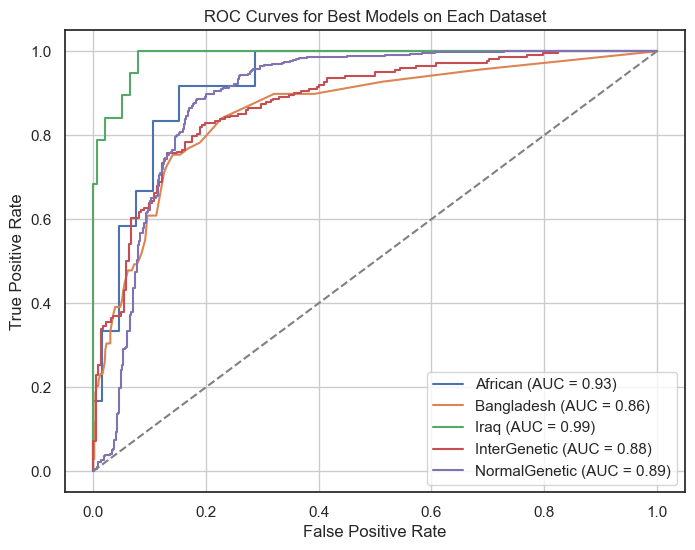

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ── 1) Prepare ROC datasets using our preprocessed splits ─────────────────────
roc_datasets = {
    "African":       (X_train_african_sc,    X_test_african_sc,    y_train_african,    y_test_african),
    "Bangladesh":    (X_train_bangladesh_sc, X_test_bangladesh_sc, y_train_bangladesh, y_test_bangladesh),
    "Iraq":          (X_train_iraq_sc,       X_test_iraq_sc,       y_train_iraq,       y_test_iraq),
    "InterGenetic":  (X_train_inter,         X_test_inter,         y_train_inter,      y_test_inter),
    "NormalGenetic": (X_train_normal,        X_test_normal,        y_train_normal,     y_test_normal),
}

# ── 2) Compute ROC curve & AUC for each dataset’s best model ───────────────────
roc_data = {}
for name, (X_tr, X_te, y_tr, y_te) in roc_datasets.items():
    model = best_models_mapping[name]
    model.fit(X_tr, y_tr)                         # train on train split
    y_prob = model.predict_proba(X_te)[:, 1]      # probability for positive class
    fpr, tpr, _ = roc_curve(y_te, y_prob)         # ROC points
    roc_auc = auc(fpr, tpr)                      # AUC value
    roc_data[name] = (fpr, tpr, roc_auc)

# ── 3) Plot all ROC curves together ────────────────────────────────────────────
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_val) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")

# Diagonal “chance” line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Best Models on Each Dataset")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Feature Importance

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# ——— Assemble scaled features + original DataFrames for column names ——————
datasets_scaled = {
    "African":       (X_train_african_sc,    y_train_african,    X_train_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh, X_train_bangladesh),
    "Iraq":          (X_train_iraq_sc,       y_train_iraq,       X_train_iraq),
    "InterGenetic":  (X_train_inter,         y_train_inter,      X_train_inter),
    "NormalGenetic": (X_train_normal,        y_train_normal,     X_train_normal),
}

feature_importance_results = {}

for name, (X_scaled, y, X_df) in datasets_scaled.items():
    # Train the RandomForest on the scaled features
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_scaled, y)
    
    # Get numeric feature names
    numeric_cols = list(X_df.select_dtypes(include=[np.number]).columns)
    
    # Map importances back to column names
    imps = pd.Series(rf.feature_importances_, index=numeric_cols)
    
    # Sort descending
    feature_importance_results[name] = imps.sort_values(ascending=False)

# Print the top 5 features for each dataset
for name, fi in feature_importance_results.items():
    print(f"\n=== Top 5 features for {name} ===")
    print(fi.head(5))



=== Top 5 features for African ===
Glucose           0.432203
Systolic BP       0.077199
Chol/HDL ratio    0.067734
Age               0.066576
BMI               0.052574
dtype: float64

=== Top 5 features for Bangladesh ===
glucose         0.227721
bmi             0.110965
systolic_bp     0.097392
weight          0.096648
diastolic_bp    0.094721
dtype: float64

=== Top 5 features for Iraq ===
HbA1c    0.328009
BMI      0.263869
Chol     0.115911
Age      0.115452
LDL      0.044690
dtype: float64

=== Top 5 features for InterGenetic ===
IMPUTED_ENCODED                 0.236712
PLATFORM_AFFYMETRIX_ILLUMINA    0.146657
PLATFORM_ILLUMINA               0.136058
INTERGENIC                      0.091385
CI_LOWER_BOUND                  0.081158
dtype: float64

=== Top 5 features for NormalGenetic ===
IMPUTED_ENCODED                 0.233882
CI_RANGE                        0.232655
PLATFORM_AFFYMETRIX_ILLUMINA    0.122780
PLATFORM_AFFYMETRIX             0.118263
PVALUE_MLOG                   

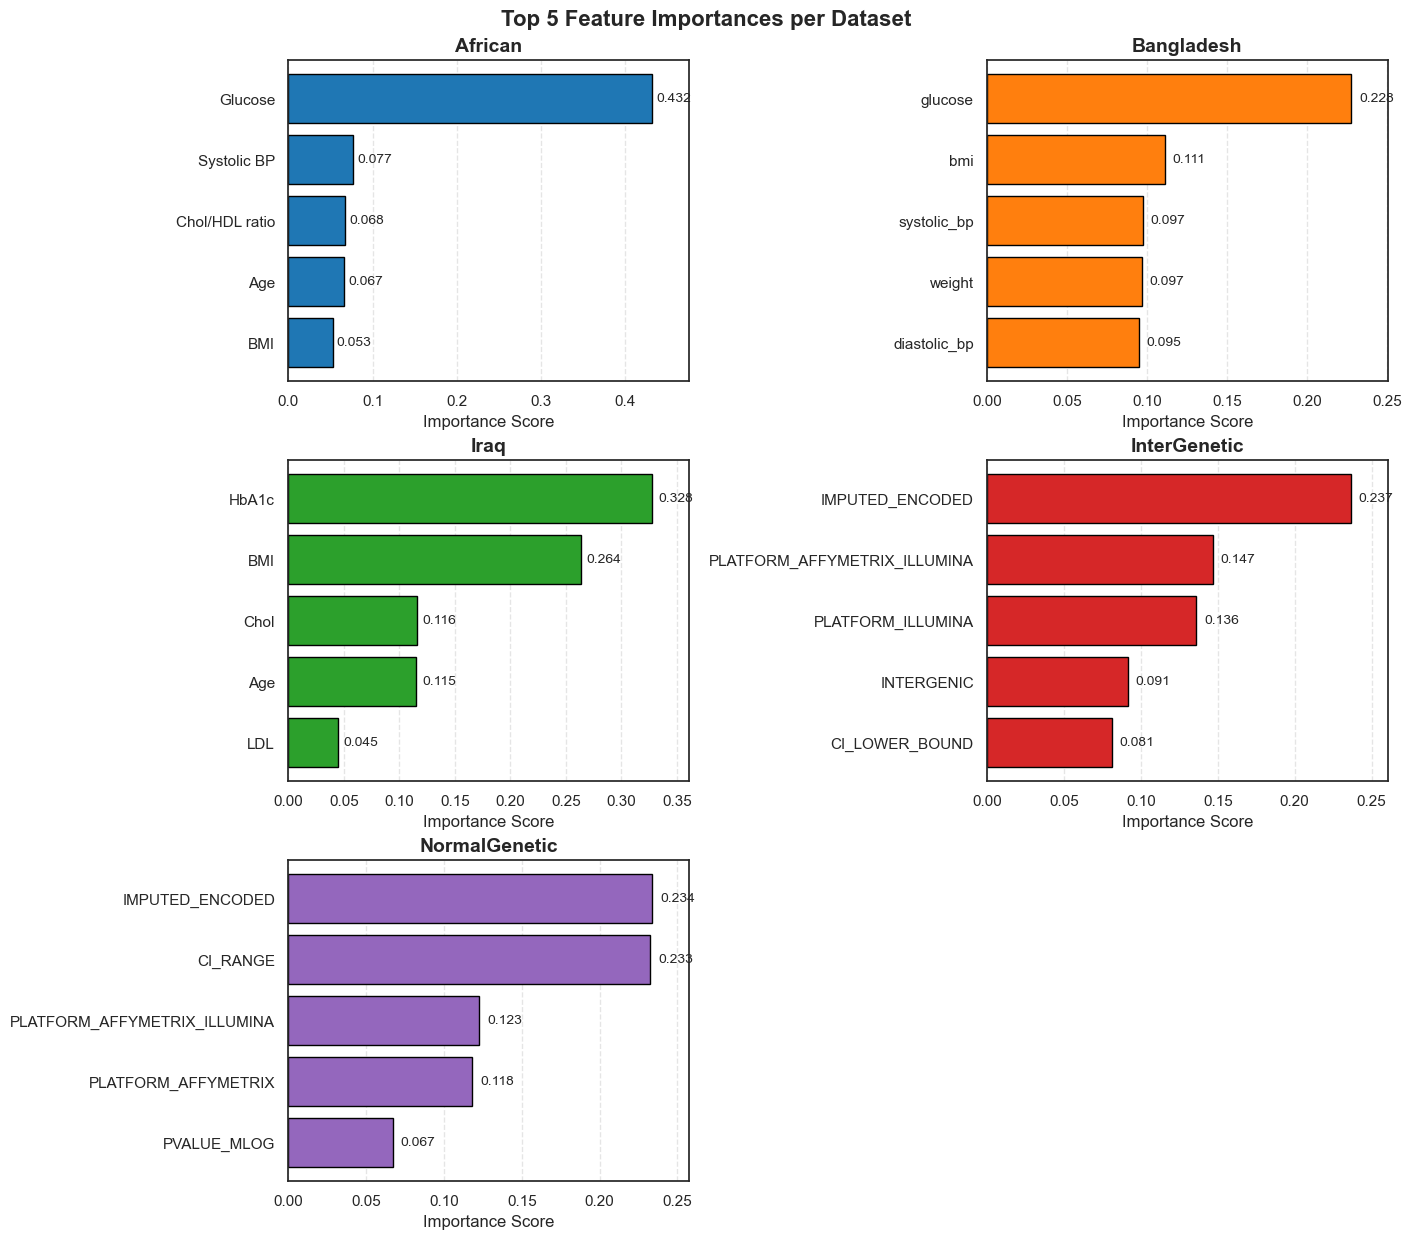

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

# Use a clean style
sns.set(style="white")

# Number of top features to show
top_n = 5

# Prepare subplots: 2 columns
n_datasets = len(feature_importance_results)
n_cols = 2
n_rows = ceil(n_datasets / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), constrained_layout=True)
axes = axes.flatten()

# A distinct color for each dataset
palette = sns.color_palette("tab10", n_colors=n_datasets)

for idx, ((dataset_name, fi_series), ax) in enumerate(zip(feature_importance_results.items(), axes)):
    # Take top_n and reverse for horizontal bar chart
    top_features = fi_series.head(top_n)[::-1]
    
    # Plot
    ax.barh(top_features.index, top_features.values, color=palette[idx], edgecolor="black")
    
    # Annotate values
    for i, v in enumerate(top_features.values):
        ax.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)
    
    # Titles and labels
    ax.set_title(dataset_name, fontsize=14, weight="bold")
    ax.set_xlabel("Importance Score", fontsize=12)
    ax.set_ylabel("")  # feature names on y-axis are clear
    
    # Consistent x-axis across subplots
    ax.set_xlim(0, max(fi_series.head(top_n).values) * 1.1)
    
    # Light grid
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(False)

# Turn off any extra axes
for ax in axes[n_datasets:]:
    ax.axis('off')

plt.suptitle("Top 5 Feature Importances per Dataset", fontsize=16, weight="bold", y=1.02)
plt.show()


# Data Fusion

Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5625 - loss: 1.3304Epoch 001 | loss=1.4059, acc=0.5093 | val_loss=1.3441, val_acc=0.6173 | 4.41s
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5047 - loss: 1.4045 - val_accuracy: 0.6173 - val_loss: 1.3441 - learning_rate: 1.0000e-04
Epoch 2/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - loss: 1.5101Epoch 002 | loss=1.3963, acc=0.5497 | val_loss=1.3382, val_acc=0.6296 | 0.08s
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5346 - loss: 1.4349 - val_accuracy: 0.6296 - val_loss: 1.3382 - learning_rate: 1.0000e-04
Epoch 3/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4688 - loss: 1.4528Epoch 003 | loss=1.3952, acc=0.5528 | val_loss=1.3336, val_acc=0.6296 | 0.08s
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5327 - loss: 1.4007 - val_accuracy: 0.6296 - val_loss: 1.3336 - learning_rate: 1.0000e-04
Epoch 4/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - loss: 1.3

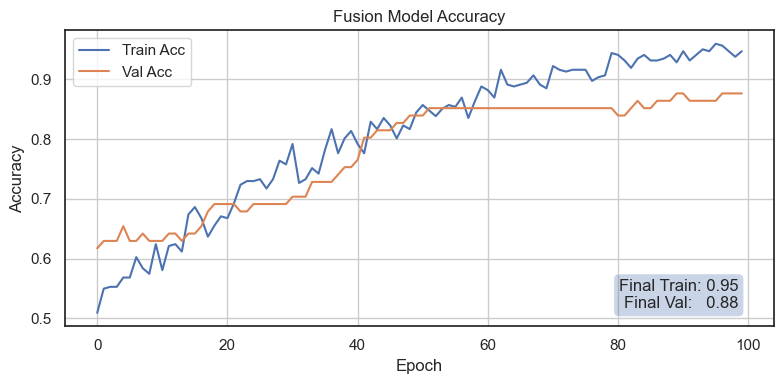

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Dense, BatchNormalization, Dropout,
    Concatenate, Add, Multiply
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback


rs = 42

# ── 1) Individually balance each modality ────────────────────────────────────
sm = SMOTE(random_state=rs)
X_bal = {}
y_bal = {}

# Apply SMOTE to clinical
X_bal["African"],    y_bal["African"]    = sm.fit_resample(X_train_african_sc,    y_train_african)
X_bal["Bangladesh"], y_bal["Bangladesh"] = sm.fit_resample(X_train_bangladesh_sc, y_train_bangladesh)
X_bal["Iraq"],       y_bal["Iraq"]       = sm.fit_resample(X_train_iraq_sc,       y_train_iraq)

# Genetic (already balanced)
X_bal["inter_genetic"],  y_bal["inter_genetic"]  = X_train_inter,  y_train_inter
X_bal["normal_genetic"], y_bal["normal_genetic"] = X_train_normal, y_train_normal

# ── 2) Down‐sample every modality and hold out 10% test ───────────────────────
modalities = list(X_bal.keys())
held_out_data = {}

X_down = {}
y_down = {}

for m in modalities:
    Xb, yb = X_bal[m], y_bal[m]
    # 10% held out for test
    Xb_main, Xb_hold, yb_main, yb_hold = train_test_split(
        Xb, yb,
        test_size=0.10,
        stratify=yb,
        random_state=rs
    )
    held_out_data[m] = (Xb_hold, yb_hold)
    X_down[m], y_down[m] = Xb_main, yb_main

# ── 3) Downsample to equal length ─────────────────────────────────────────────
N_min = min(len(y_down[m]) for m in modalities)
for m in modalities:
    Xb, yb = X_down[m], y_down[m]
    if len(yb) > N_min:
        Xb_ds, _, yb_ds, _ = train_test_split(
            Xb, yb,
            train_size=N_min,
            stratify=yb,
            random_state=rs
        )
    else:
        Xb_ds, yb_ds = Xb, yb
    X_down[m], y_down[m] = Xb_ds, yb_ds

# ── 4) Build shared train/test indices ────────────────────────────────────────
indices = np.arange(N_min)
idx_tr, idx_te = train_test_split(
    indices,
    test_size=0.2,
    stratify=y_down[modalities[0]],
    random_state=rs
)

# ── 5) Scale each modality using row‐based indexing ──────────────────────────
scaled_splits = {}
for m in modalities:
    Xb = X_down[m]
    Xb_tr = Xb.iloc[idx_tr] if isinstance(Xb, pd.DataFrame) else Xb[idx_tr]
    Xb_te = Xb.iloc[idx_te] if isinstance(Xb, pd.DataFrame) else Xb[idx_te]
    scaler = StandardScaler().fit(Xb_tr)
    scaled_splits[m] = (
        scaler.transform(Xb_tr),
        scaler.transform(Xb_te),
        scaler.transform(held_out_data[m][0])  # scale held-out test set
    )

X_tr_inputs = [scaled_splits[m][0] for m in modalities]
X_te_inputs = [scaled_splits[m][1] for m in modalities]
X_modality_tests = {m: scaled_splits[m][2] for m in modalities}

y_tr = y_down[modalities[0]].iloc[idx_tr] if isinstance(y_down[modalities[0]], pd.Series) else y_down[modalities[0]][idx_tr]
y_te = y_down[modalities[0]].iloc[idx_te] if isinstance(y_down[modalities[0]], pd.Series) else y_down[modalities[0]][idx_te]
y_modality_tests = {m: held_out_data[m][1] for m in modalities}


# ── 5) Define fusion model ──────────────────────────────────────────────────
def build_branch(input_dim, l2_reg=1e-3):
    inp = Input(shape=(input_dim,))
    x   = Dense(64, activation="relu", kernel_regularizer=l2(l2_reg))(inp)
    x   = BatchNormalization()(x)
    x   = Dense(32, activation="relu", kernel_regularizer=l2(l2_reg))(x)
    proj= Dense(32, kernel_regularizer=l2(l2_reg))(inp)
    x   = Add()([x, proj])
    x   = BatchNormalization()(x)
    return inp, x

branches = [build_branch(scaled_splits[m][0].shape[1]) for m in modalities]
inputs, feats = zip(*branches)

merged = Concatenate()(feats)
se = Dense(merged.shape[-1] // 16, activation="relu")(merged)
se = Dense(merged.shape[-1], activation="sigmoid")(se)
x  = Multiply()([merged, se])
x  = Dense(128, activation="relu", kernel_regularizer=l2(1e-3))(x)
x  = Dropout(0.5)(x)
x  = Dense(64, activation="relu", kernel_regularizer=l2(1e-3))(x)
x  = Dropout(0.5)(x)
out= Dense(1, activation="sigmoid")(x)

model = Model(inputs=list(inputs), outputs=out)
model.compile(
    optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ── 6) Train with time logger ───────────────────────────────────────────────
class TimeLogger(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self._start = time.time()
    def on_epoch_end(self, epoch, logs=None):
        dt = time.time() - self._start
        print(
            f"Epoch {epoch+1:03d} | loss={logs['loss']:.4f}, acc={logs['accuracy']:.4f} | "
            f"val_loss={logs['val_loss']:.4f}, val_acc={logs['val_accuracy']:.4f} | "
            f"{dt:.2f}s"
        )

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6),
    TimeLogger()
]

history = model.fit(
    X_tr_inputs, y_tr,
    validation_data=(X_te_inputs, y_te),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)

# Extract final accuracies
train_final = history.history["accuracy"][-1]
val_final   = history.history["val_accuracy"][-1]

# 7) Plot training & validation accuracy ─────────────────────────────────
plt.figure(figsize=(8,4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")

# Annotate final values in the lower‐right corner
plt.text(
    0.95, 0.05,
    f"Final Train: {train_final:.2f}\nFinal Val:   {val_final:.2f}",
    transform=plt.gca().transAxes,
    ha="right", va="bottom",
    bbox=dict(boxstyle="round,pad=0.3", alpha=0.3)
)

plt.title("Fusion Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📊 Accuracy on Held-Out 10% from Each Modality
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
African         Accuracy: 0.8667 | Samples: 45
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Bangladesh      Accuracy: 0.4733 | Samples: 693
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iraq            Accuracy: 0.5000 | Samples: 94
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
inter_genetic   Accuracy: 0.4936 | Samples: 156
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
normal_genetic  Accuracy: 0.5033 | Samples: 300


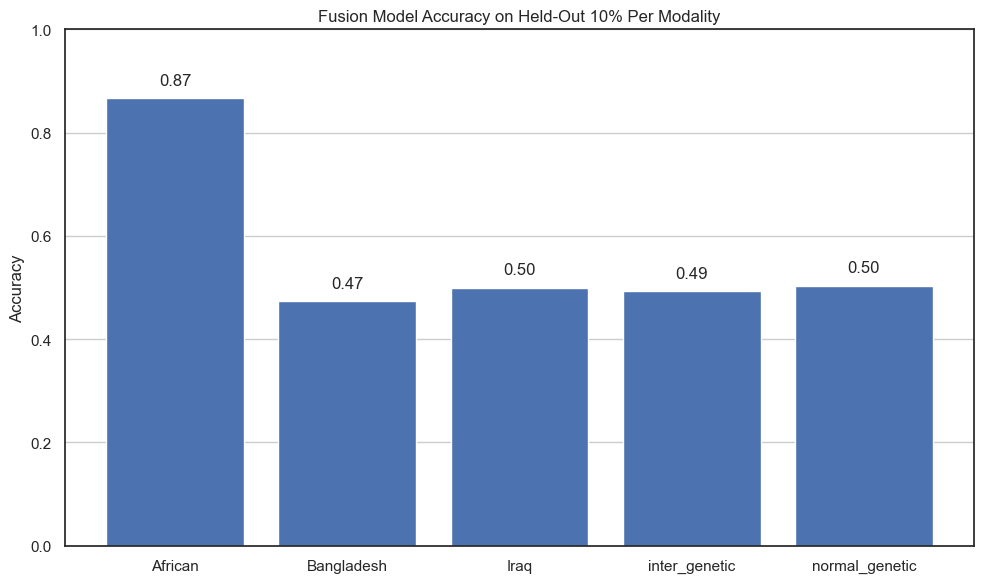

In [58]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Evaluate each modality's held-out test set
accuracies = []

print("📊 Accuracy on Held-Out 10% from Each Modality")
for m in modalities:
    n_samples = X_modality_tests[m].shape[0]
    X_test = []
    for k in modalities:
        if k == m:
            X_test.append(X_modality_tests[k])  # real data
        else:
            shape = (n_samples, X_modality_tests[k].shape[1])
            X_test.append(np.zeros(shape))  # zeroed input for other branches

    y_true = y_modality_tests[m]
    y_pred = (model.predict(X_test).flatten() >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    accuracies.append((m, acc))
    print(f"{m:<15} Accuracy: {acc:.4f} | Samples: {len(y_true)}")

# Step 2: Plot the accuracy results
labels, acc_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, acc_values)
plt.ylabel('Accuracy')
plt.title('Fusion Model Accuracy on Held-Out 10% Per Modality')
plt.ylim(0, 1)
plt.grid(axis='y')

# Annotate bars
for bar, acc in zip(bars, acc_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{acc:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [61]:
import shap
import numpy as np

# SHAP supports only 1 input array — so we concatenate all modality features
X_test_fusion = np.concatenate(X_te_inputs, axis=1)

# Define a new wrapper model for SHAP that takes a single input
def fusion_predict(x):
    # Split back into 5 modality arrays
    splits = []
    start = 0
    for arr in X_te_inputs:
        end = start + arr.shape[1]
        splits.append(x[:, start:end])
        start = end
    return model.predict(splits)

# Use a sample for faster SHAP computation
X_sample = shap.utils.sample(X_test_fusion, 100, random_state=42)

# Create SHAP explainer
explainer = shap.Explainer(fusion_predict, X_sample)
shap_values = explainer(X_sample)


354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
359/359 ━━━

PermutationExplainer explainer:  10%|▉         | 8/81 [00:00<?, ?it/s]

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


PermutationExplainer explainer:  12%|█▏        | 10/81 [00:11<00:49,  1.45it/s]

382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


PermutationExplainer explainer:  14%|█▎        | 11/81 [00:13<01:11,  1.02s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


PermutationExplainer explainer:  15%|█▍        | 12/81 [00:14<01:20,  1.17s/it]

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


PermutationExplainer explainer:  16%|█▌        | 13/81 [00:16<01:25,  1.26s/it]

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


PermutationExplainer explainer:  17%|█▋        | 14/81 [00:17<01:30,  1.36s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  19%|█▊        | 15/81 [00:19<01:44,  1.58s/it]

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


PermutationExplainer explainer:  20%|█▉        | 16/81 [00:21<01:38,  1.52s/it]

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


PermutationExplainer explainer:  21%|██        | 17/81 [00:22<01:34,  1.48s/it]

374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


PermutationExplainer explainer:  22%|██▏       | 18/81 [00:23<01:31,  1.46s/it]

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


PermutationExplainer explainer:  23%|██▎       | 19/81 [00:25<01:29,  1.44s/it]

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


PermutationExplainer explainer:  25%|██▍       | 20/81 [00:27<01:32,  1.52s/it]

341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  26%|██▌       | 21/81 [00:28<01:31,  1.52s/it]

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  27%|██▋       | 22/81 [00:30<01:31,  1.56s/it]

344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


PermutationExplainer explainer:  28%|██▊       | 23/81 [00:31<01:29,  1.55s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  30%|██▉       | 24/81 [00:33<01:29,  1.57s/it]

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


PermutationExplainer explainer:  31%|███       | 25/81 [00:35<01:32,  1.65s/it]

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


PermutationExplainer explainer:  32%|███▏      | 26/81 [00:36<01:29,  1.62s/it]

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


PermutationExplainer explainer:  33%|███▎      | 27/81 [00:38<01:21,  1.52s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


PermutationExplainer explainer:  35%|███▍      | 28/81 [00:39<01:19,  1.51s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step


PermutationExplainer explainer:  36%|███▌      | 29/81 [00:41<01:19,  1.53s/it]

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


PermutationExplainer explainer:  37%|███▋      | 30/81 [00:42<01:18,  1.55s/it]

343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


PermutationExplainer explainer:  38%|███▊      | 31/81 [00:44<01:18,  1.58s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


PermutationExplainer explainer:  40%|███▉      | 32/81 [00:45<01:18,  1.59s/it]

373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 33/81 [00:47<01:16,  1.60s/it]

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


PermutationExplainer explainer:  42%|████▏     | 34/81 [00:49<01:13,  1.57s/it]

342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step


PermutationExplainer explainer:  43%|████▎     | 35/81 [00:50<01:08,  1.48s/it]

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


PermutationExplainer explainer:  44%|████▍     | 36/81 [00:51<01:03,  1.42s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


PermutationExplainer explainer:  46%|████▌     | 37/81 [00:53<01:01,  1.40s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  47%|████▋     | 38/81 [00:54<01:06,  1.55s/it]

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


PermutationExplainer explainer:  48%|████▊     | 39/81 [00:56<01:04,  1.53s/it]

355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


PermutationExplainer explainer:  49%|████▉     | 40/81 [00:57<00:59,  1.45s/it]

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


PermutationExplainer explainer:  51%|█████     | 41/81 [00:58<00:55,  1.38s/it]

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


PermutationExplainer explainer:  52%|█████▏    | 42/81 [01:00<00:52,  1.34s/it]

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


PermutationExplainer explainer:  53%|█████▎    | 43/81 [01:01<00:51,  1.35s/it]

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


PermutationExplainer explainer:  54%|█████▍    | 44/81 [01:03<00:51,  1.40s/it]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


PermutationExplainer explainer:  56%|█████▌    | 45/81 [01:04<00:49,  1.36s/it]

355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 46/81 [01:05<00:50,  1.46s/it]

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 47/81 [01:07<00:54,  1.62s/it]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 48/81 [01:10<01:03,  1.93s/it]

345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 49/81 [01:13<01:06,  2.08s/it]

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 50/81 [01:14<01:02,  2.02s/it]

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


PermutationExplainer explainer:  63%|██████▎   | 51/81 [01:16<00:57,  1.91s/it]

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 52/81 [01:20<01:12,  2.49s/it]

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  65%|██████▌   | 53/81 [01:22<01:05,  2.34s/it]

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  67%|██████▋   | 54/81 [01:24<00:58,  2.16s/it]

355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


PermutationExplainer explainer:  68%|██████▊   | 55/81 [01:25<00:50,  1.96s/it]

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


PermutationExplainer explainer:  69%|██████▉   | 56/81 [01:27<00:45,  1.80s/it]

365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


PermutationExplainer explainer:  70%|███████   | 57/81 [01:28<00:40,  1.67s/it]

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


PermutationExplainer explainer:  72%|███████▏  | 58/81 [01:29<00:35,  1.55s/it]

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


PermutationExplainer explainer:  73%|███████▎  | 59/81 [01:30<00:32,  1.46s/it]

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


PermutationExplainer explainer:  74%|███████▍  | 60/81 [01:32<00:29,  1.41s/it]

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


PermutationExplainer explainer:  75%|███████▌  | 61/81 [01:33<00:29,  1.45s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


PermutationExplainer explainer:  77%|███████▋  | 62/81 [01:35<00:29,  1.55s/it]

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


PermutationExplainer explainer:  78%|███████▊  | 63/81 [01:37<00:27,  1.54s/it]

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


PermutationExplainer explainer:  79%|███████▉  | 64/81 [01:38<00:25,  1.50s/it]

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


PermutationExplainer explainer:  80%|████████  | 65/81 [01:40<00:24,  1.50s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 66/81 [01:41<00:23,  1.55s/it]

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


PermutationExplainer explainer:  83%|████████▎ | 67/81 [01:43<00:22,  1.59s/it]

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


PermutationExplainer explainer:  84%|████████▍ | 68/81 [01:44<00:20,  1.54s/it]

374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step


PermutationExplainer explainer:  85%|████████▌ | 69/81 [01:46<00:18,  1.53s/it]

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 70/81 [01:47<00:17,  1.57s/it]

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  88%|████████▊ | 71/81 [01:49<00:16,  1.66s/it]

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


PermutationExplainer explainer:  89%|████████▉ | 72/81 [01:51<00:15,  1.68s/it]

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


PermutationExplainer explainer:  90%|█████████ | 73/81 [01:53<00:13,  1.67s/it]

378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  91%|█████████▏| 74/81 [01:54<00:11,  1.69s/it]

348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 75/81 [01:56<00:10,  1.68s/it]

344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  94%|█████████▍| 76/81 [01:58<00:08,  1.69s/it]

355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 77/81 [02:00<00:06,  1.70s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


PermutationExplainer explainer:  96%|█████████▋| 78/81 [02:01<00:05,  1.68s/it]

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


PermutationExplainer explainer:  98%|█████████▊| 79/81 [02:03<00:03,  1.62s/it]

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


PermutationExplainer explainer:  99%|█████████▉| 80/81 [02:04<00:01,  1.56s/it]

358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


PermutationExplainer explainer: 100%|██████████| 81/81 [02:06<00:00,  1.54s/it]

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


PermutationExplainer explainer: 82it [02:07,  1.72s/it]                        


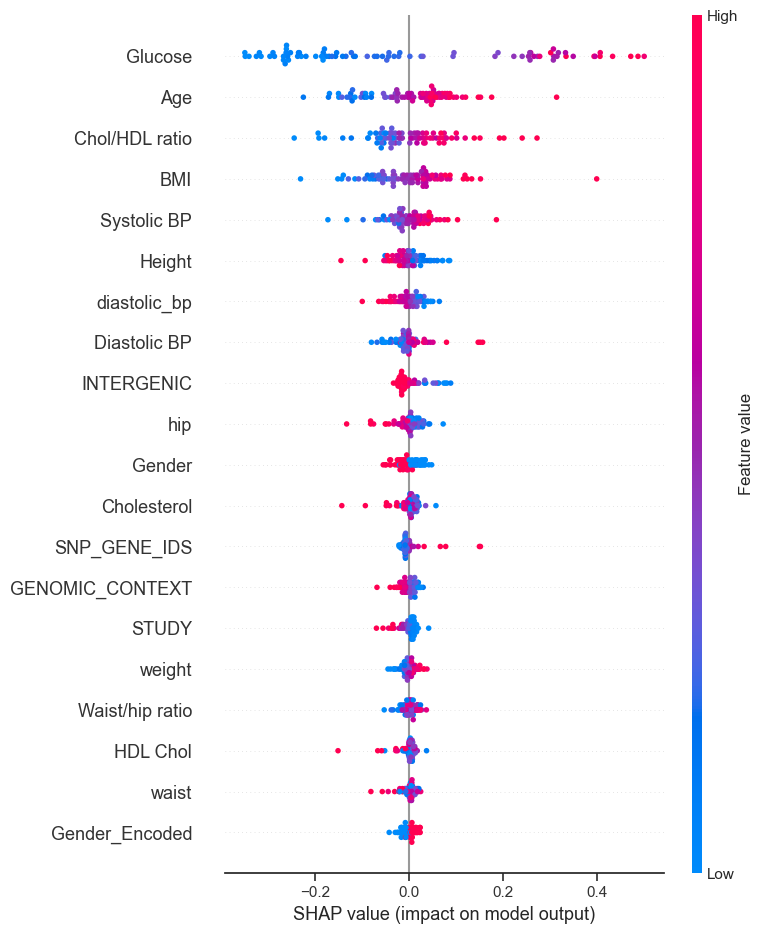

In [62]:
shap.summary_plot(shap_values, X_sample, feature_names=[
    *feature_names_dict['African'],
    *feature_names_dict['Bangladesh'],
    *feature_names_dict['Iraq'],
    *feature_names_dict['inter_genetic'],
    *feature_names_dict['normal_genetic']
])


# Saving model and scalers

In [63]:
# Save in Keras v3 native format
"""model.save('/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras')"""


"model.save('/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras')"

In [64]:
"""import tensorflow as tf
model = tf.keras.models.load_model(
    '/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras'
)"""


"import tensorflow as tf\nmodel = tf.keras.models.load_model(\n    '/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras'\n)"

In [65]:
# right after training…
"""model.save('fusion_model.h5')

from tensorflow.keras.models import load_model
model = load_model('fusion_model.h5')"""


"model.save('fusion_model.h5')\n\nfrom tensorflow.keras.models import load_model\nmodel = load_model('fusion_model.h5')"

In [66]:
"""import pickle
from tensorflow.keras.models import model_from_json

# ── Saving ──────────────────────────────────────────────────────────────────
# 1) Serialize architecture to JSON
arch = model.to_json()
# 2) Get raw weights
wts  = model.get_weights()
# 3) Dump both into a pickle
with open('fusion_model.pkl', 'wb') as f:
    pickle.dump({'arch': arch, 'weights': wts}, f)

# ── Loading ─────────────────────────────────────────────────────────────────
with open('fusion_model.pkl', 'rb') as f:
    data = pickle.load(f)

# 1) Reconstruct from JSON
model = model_from_json(data['arch'])
# 2) Set the weights back
model.set_weights(data['weights'])
# 3) (Re)compile if you want to further train or evaluate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])"""


"import pickle\nfrom tensorflow.keras.models import model_from_json\n\n# ── Saving ──────────────────────────────────────────────────────────────────\n# 1) Serialize architecture to JSON\narch = model.to_json()\n# 2) Get raw weights\nwts  = model.get_weights()\n# 3) Dump both into a pickle\nwith open('fusion_model.pkl', 'wb') as f:\n    pickle.dump({'arch': arch, 'weights': wts}, f)\n\n# ── Loading ─────────────────────────────────────────────────────────────────\nwith open('fusion_model.pkl', 'rb') as f:\n    data = pickle.load(f)\n\n# 1) Reconstruct from JSON\nmodel = model_from_json(data['arch'])\n# 2) Set the weights back\nmodel.set_weights(data['weights'])\n# 3) (Re)compile if you want to further train or evaluate\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])"